Neural Network definition

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

class MyNeuralNetwork():
    """
    My implementation of a Neural Network Classifier.
    """

    acti_fns = ['relu', 'sigmoid', 'linear', 'tanh', 'softmax']
    weight_inits = ['zero', 'random', 'normal']

    def __init__(self, n_layers, layer_sizes, activation, learning_rate, weight_init, batch_size, num_epochs):
        """
        Initializing a new MyNeuralNetwork object

        Parameters
        ----------
        n_layers : int value specifying the number of layers

        layer_sizes : integer array of size n_layers specifying the number of nodes in each layer

        activation : string specifying the activation function to be used
                     possible inputs: relu, sigmoid, linear, tanh

        learning_rate : float value specifying the learning rate to be used

        weight_init : string specifying the weight initialization function to be used
                      possible inputs: zero, random, normal

        batch_size : int value specifying the batch size to be used

        num_epochs : int value specifying the number of epochs to be used
        """

        if activation not in self.acti_fns:
            raise Exception('Incorrect Activation Function')

        if weight_init not in self.weight_inits:
            raise Exception('Incorrect Weight Initialization Function')
        pass
        self.n_layers = n_layers
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.learning_rate = learning_rate
        self.weight_init = weight_init
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        # weights and biases
        self.Ws = []
        self.Bs = []
        # storing weights and biases after each epoch (for plotting loss-vs-epochs curves)
        self.wts_epochs = [] 
        self.bias_epochs = []

    def relu(self, X):
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 2-dimentional numpy array of shape=(batch_size, layer_size)

        Returns
        -------
        x_calc : 2-dimensional numpy array after calculating the necessary function over X
        """
    
        x_calc = np.maximum(X,0)
        return x_calc

    def relu_grad(self, X):
        """
        Calculating the gradient of ReLU activation for a particular layer

        Parameters
        ----------
        X : 2-dimentional numpy array of shape=(batch_size, layer_size)

        Returns
        -------
        x_calc : 2-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = np.zeros(shape = X.shape)
        x_calc[np.where(X>0)]=1
        return x_calc

    def sigmoid(self, X):
        """
        Calculating the Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 2-dimentional numpy array of shape=(batch_size, layer_size)

        Returns
        -------
        x_calc : 2-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = 1 / (1 + np.exp(-X))
        return x_calc

    def sigmoid_grad(self, X):
        """
        Calculating the gradient of Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 2-dimentional numpy array of shape=(batch_size, layer_size)

        Returns
        -------
        x_calc : 2-dimensional numpy array after calculating the necessary function over X
        """
        sig = self.sigmoid(X)
        x_calc = sig*(1-sig)
        return x_calc

    def linear(self, X):
        """
        Calculating the Linear activation for a particular layer

        Parameters
        ----------
        X : 2-dimentional numpy array of shape=(batch_size, layer_size)

        Returns
        -------
        x_calc : 2-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = np.array(X)
        return x_calc

    def linear_grad(self, X):
        """
        Calculating the gradient of Linear activation for a particular layer

        Parameters
        ----------
        X : 2-dimentional numpy array of shape=(batch_size, layer_size)

        Returns
        -------
        x_calc : 2-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = np.ones(shape = X.shape)
        return x_calc

    def tanh(self, X):
        """
        Calculating the Tanh activation for a particular layer

        Parameters
        ----------
        X : 2-dimentional numpy array of shape=(batch_size, layer_size)

        Returns
        -------
        x_calc : 2-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = ((np.exp(X) - np.exp(-X))/(np.exp(X) + np.exp(-X)))
        return x_calc

    def tanh_grad(self, X):
        """
        Calculating the gradient of Tanh activation for a particular layer

        Parameters
        ----------
        X : 2-dimentional numpy array of shape=(batch_size, layer_size)

        Returns
        -------
        x_calc : 2-dimensional numpy array after calculating the necessary function over X
        """
        tnh = self.tanh(X)
        x_calc = 1 - np.square(tnh)
        return x_calc

    def softmax(self, X):
        """
        Calculating the Softmax activation for a particular layer

        Parameters
        ----------
        X : 2-dimentional numpy array of shape=(batch_size, layer_size)

        Returns
        -------
        x_calc : 2-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = np.exp(X) / (np.sum(np.exp(X), axis=-1).reshape(X.shape[0],1))
        return x_calc

    def softmax_grad(self, X):
        """
        Calculating the gradient of Softmax activation for a particular layer

        Parameters
        ----------
        X : 2-dimentional numpy array of shape=(batch_size, layer_size)

        Returns
        -------
        x_calc : 2-dimensional numpy array after calculating the necessary function over X
        """
        x = np.array(X)
        sm = self.softmax(x)
        x_calc = sm*(1-sm)
        return x_calc

    def zero_init(self, shape):
        """
        Calculating the initial weights after Zero Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        weight = np.zeros(shape)
        return weight

    def random_init(self, shape):
        """
        Calculating the initial weights after Random Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        np.random.seed(70)
        weight = 0.01*np.random.rand(shape)
        return weight

    def normal_init(self, shape):
        """
        Calculating the initial weights after Normal(0,1) Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        np.random.seed(70)
        weight = 0.01*np.random.normal(0, 1, shape)
        return weight

    def init_weights(self, shape):
      """
      Applying the initialization according to hyperparameter
      """
      if self.weight_init=='zero':
        return self.zero_init(shape)
      elif self.weight_init=='random':
        return self.random_init(shape)
      else:
        return self.normal_init(shape)

    def cross_entropy(self, true_labels, pred_probs):
      """
      Calculating cross entropy loss
      """
      n = pred_probs.shape[0]
      crossentropyloss = -np.sum(true_labels * np.log(pred_probs + (0.00000000001))) / n
      return crossentropyloss
    
    def activ(self,z):
      """
      Apply activation according to hyperparameter
      """
      if self.activation=='relu':
        return self.relu(z)
      elif self.activation=='sigmoid':
        return self.sigmoid(z)
      elif self.activation=='linear':
        return self.linear(z)
      elif self.activation=='tanh':
        return self.tanh(z)
      else:
        return self.softmax(z)
    
    def activ_grad(self,z):
      """
      find gradient of activation function according to hyperparameter
      """
      if self.activation=='relu':
        return self.relu_grad(z)
      elif self.activation=='sigmoid':
        return self.sigmoid_grad(z)
      elif self.activation=='linear':
        return self.linear_grad(z)
      elif self.activation=='tanh':
        return self.tanh_grad(z)
      else:
        return self.softmax_grad(z)

    def one_hot_encode(self, y):
        """
        Function to one-hot-encode y
        """
        ycats = list(np.unique(y))
        ncats = len(ycats)
        y_hot = np.zeros(shape=(ncats,ncats))
        for i in range(ncats):
          y_hot[i][i] = 1
        yonehot = []
        for i in range(len(y)):
          yonehot.append(y_hot[ycats.index(y[i])])
        
        yonehot = np.array(yonehot)
        return yonehot

    def fit(self, X, y):
        """
        Fitting (training) the linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.
        
        Returns
        -------
        self : an instance of self
        """
        X = np.array(X)
        y = np.array(y)

        # one hot encoding y
        y_onehot = self.one_hot_encode(y)

        # initializing weights and biases
        Ns = self.layer_sizes
        
        self.Ws.append([])
        self.Bs.append([])
      
        for i in range(1, self.n_layers):
          w = self.init_weights((Ns[i-1],Ns[i]))
          b = np.zeros(shape=(Ns[i]))
          self.Ws.append(w)
          self.Bs.append(b)
          
        # calculate number of batches
        n_batches = X.shape[0]//self.batch_size

        # training for each epoch
        for i in range(self.num_epochs):
          for j in range(n_batches):
            index1 = j*self.batch_size
            index2 = index1 + self.batch_size
            X_batch = X[index1:index2:]
            Y_batch = y_onehot[index1:index2]
            y_forward = self.forward_pass(X_batch)
            Loss = self.cross_entropy(Y_batch, y_forward)
            self.backpropagate(X_batch, Y_batch, y_forward)
          self.wts_epochs.append(copy.deepcopy(self.Ws))
          self.bias_epochs.append(copy.deepcopy(self.Bs))
       
        return self
    
    def forward_pass(self, X):
        """
        Forward pass to predict the probabilities of classes according to the weights
        """
        self.As = []
        self.Zs = []
        self.Zs.append([])
        self.As.append(np.array(X))

        for i in range(1, self.n_layers):
          z = np.dot(self.As[i-1], self.Ws[i]) + self.Bs[i]
          if (i == self.n_layers-1):
            a = self.softmax(z)
          else:
            a = self.activ(z)
          self.Zs.append(z)
          self.As.append(a)
        
        y_forward = self.As[-1]
        return y_forward

    def backpropagate(self, X, y_onehot, y_forward):
        """
        Applying gradient descent to train the weigths and biases using backpropagation
        """
        dz = (y_forward - y_onehot)/y_onehot.shape[0]
        dw = np.dot(self.As[self.n_layers-2].T, dz)
        db = dz.mean(axis=0)*self.As[self.n_layers-2].shape[0]

        dz_next = np.dot(dz, self.Ws[self.n_layers-1].T)

        self.Ws[self.n_layers-1] = self.Ws[self.n_layers-1] - (self.learning_rate*dw)
        self.Bs[self.n_layers-1] = self.Bs[self.n_layers-1] - (self.learning_rate*db)

        for i in range(self.n_layers-2, 0, -1):
            act_grad = self.activ_grad(self.Zs[i])
            dz = dz_next * act_grad
            dw = np.dot(self.As[i-1].T, dz) 
            db = dz.mean(axis=0)*self.As[i-1].shape[0]
            
            dz_next = np.dot(dz, self.Ws[i].T)

            self.Ws[i] = self.Ws[i] - (self.learning_rate * dw)
            self.Bs[i] = self.Bs[i] - (self.learning_rate * db)

        
    def predict_proba(self, X):
        """
        Predicting probabilities using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 2-dimensional numpy array of shape (n_samples, n_classes) which contains the 
            class wise prediction probabilities.
        """
        y_probs = self.forward_pass(X)
        return y_probs

    def predict(self, X):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        # return the numpy array y which contains the predicted values
        -------
        y : 1-dimensional numpy array of shape (n_samples,) which contains the predicted values.
        """
        probs = self.predict_proba(X)
        n_samples = probs.shape[0]
        y = np.zeros(shape=n_samples)
        for i in range(n_samples):
          cls = np.argmax(probs[i])
          y[i] = cls

        y = np.array(y)
        return y

    def score(self, X, y):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as testing labels.

        Returns
        -------
        acc : float value specifying the accuracy of the model on the provided testing set
        """
        y = np.array(y)
        predicted = self.predict(X)
        n_samples = y.shape[0]
        acc = np.sum(y==predicted)/n_samples
      
        return acc

    def losses_epochs(self, X, y):
        """
        Calculate loss after each epoch according to the weights at each epoch
        """
        losses = []
        for ep in range(self.num_epochs):
            A = X
            for i in range(1, self.n_layers):
                z = np.dot(A, self.wts_epochs[ep][i]) + self.bias_epochs[ep][i]
                if (i == self.n_layers-1):
                  a = self.softmax(z)
                else:
                  a = self.activ(z)
                A = a
            ls = self.cross_entropy(y, A)
            losses.append(ls)
        return losses
    
    def plot_loss_epoch(self, X_train, y_train, X_val, y_val):
        """
        Plot the training-loss vs epoch curve and validation-loss vs epoch curve
        """
        Y_train = self.one_hot_encode(y_train)
        Y_val = self.one_hot_encode(y_val)
        
        train_losses = self.losses_epochs(X_train, Y_train)
        val_losses = self.losses_epochs(X_val, Y_val)

        plt.plot(train_losses,label='Training loss')
        plt.plot(val_losses,label='Validation loss')
        plt.ylabel('Cross Entropy loss')
        plt.xlabel('Epochs')
        plt.legend()
        plt.title(self.activation+": Loss vs Epochs")
        plt.show()


Loading Data

In [5]:
from keras.datasets import mnist
import pickle

(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X.reshape((train_X.shape[0],784)) # flatten images
train_X = train_X/255.0 # normalize data

# divide train-set into train and validation
ind = int(0.8*(train_X.shape[0]))
X_train = train_X[:ind]
y_train = train_y[:ind]

X_val = train_X[ind:]
y_val = train_y[ind:]

X_test = test_X.reshape((test_X.shape[0],784)) # flatten images
X_test = X_test/255.0 # normalize data

ReLU


ReLU
Train accuracy: 1.0
Validation accuracy: 0.97425
Test accuracy: 0.974


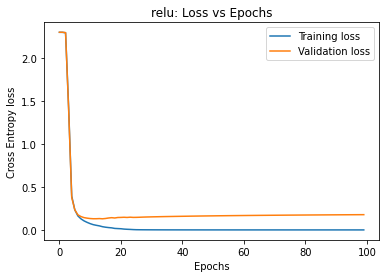

In [6]:
relu_model = MyNeuralNetwork(5,[784,256,128,64,10],'relu',0.1, 'normal', 100, 100)
relu_model.fit(X_train, y_train)
print("ReLU")
print("Train accuracy:", relu_model.score(X_train, y_train))
print("Validation accuracy:", relu_model.score(X_val, y_val))
print("Test accuracy:", relu_model.score(X_test, test_y))
relu_model.plot_loss_epoch(X_train, y_train, X_val, y_val)
pickle.dump(relu_model, open("relu_model","wb"))

Sigmoid

Sigmoid
Train accuracy: 0.9604375
Validation accuracy: 0.9506666666666667
Test accuracy: 0.9487


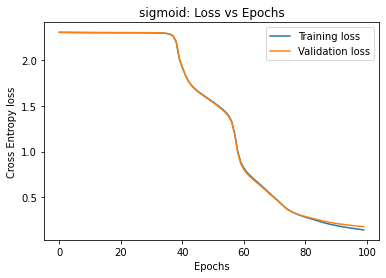

In [7]:
sigmoid_model = MyNeuralNetwork(5,[784,256,128,64,10],'sigmoid',0.1, 'normal', 100, 100)
sigmoid_model.fit(X_train, y_train)
print("Sigmoid")
print("Train accuracy:", sigmoid_model.score(X_train, y_train))
print("Validation accuracy:", sigmoid_model.score(X_val, y_val))
print("Test accuracy:", sigmoid_model.score(X_test, test_y))
sigmoid_model.plot_loss_epoch(X_train, y_train, X_val, y_val)
pickle.dump(sigmoid_model, open("sigmoid_model","wb"))

Linear

Linear
Train accuracy: 0.924125
Validation accuracy: 0.9191666666666667
Test accuracy: 0.9143


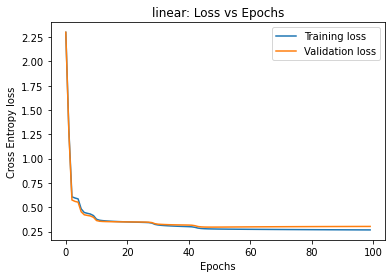

In [8]:
linear_model = MyNeuralNetwork(5,[784,256,128,64,10],'linear',0.1, 'normal', 100, 100)
linear_model.fit(X_train, y_train)
print("Linear")
print("Train accuracy:", linear_model.score(X_train, y_train))
print("Validation accuracy:", linear_model.score(X_val, y_val))
print("Test accuracy:", linear_model.score(X_test, test_y))
linear_model.plot_loss_epoch(X_train, y_train, X_val, y_val)
pickle.dump(linear_model, open("linear_model","wb"))

Tanh

Tanh
Train accuracy: 1.0
Validation accuracy: 0.9746666666666667
Test accuracy: 0.9733


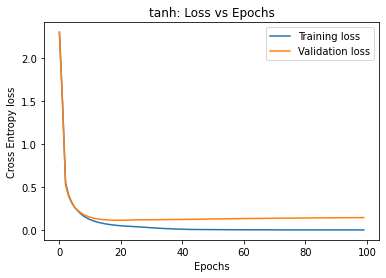

In [9]:
tanh_model = MyNeuralNetwork(5,[784,256,128,64,10],'tanh',0.1, 'normal', 100, 100)
tanh_model.fit(X_train, y_train)
print("Tanh")
print("Train accuracy:", tanh_model.score(X_train, y_train))
print("Validation accuracy:", tanh_model.score(X_val, y_val))
print("Test accuracy:", tanh_model.score(X_test, test_y))
tanh_model.plot_loss_epoch(X_train, y_train, X_val, y_val)
pickle.dump(tanh_model, open("tanh_model","wb"))

tSNE plot 

In [10]:
from sklearn.manifold import TSNE
import seaborn as sns

x = relu_model.As[3]
tsne = TSNE(n_components=2)
x1 = tsne.fit_transform(x)

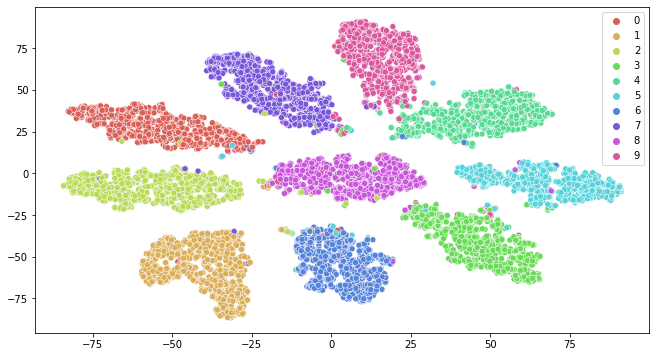

In [11]:
y = test_y
plt.figure(figsize=(11,6))
sns.scatterplot(x=x1[:,0],y=x1[:,1],  hue=y, palette=sns.color_palette("hls", 10))
plt.show()

MLP Classifier

In [12]:
from sklearn.neural_network import MLPClassifier

MLP_clf = MLPClassifier(hidden_layer_sizes=(256,128,64,), activation='relu', batch_size=100, max_iter=100)
MLP_clf.fit(X_train, y_train)
print("ReLU: Test accuracy: ", MLP_clf.score(X_test, test_y))

MLP_clf = MLPClassifier(hidden_layer_sizes=(256,128,64,), activation='logistic', batch_size=100, max_iter=100)
MLP_clf.fit(X_train, y_train)
print("Sigmoid: Test accuracy: ", MLP_clf.score(X_test, test_y))


MLP_clf = MLPClassifier(hidden_layer_sizes=(256,128,64,), activation='identity', batch_size=100, max_iter=100)
MLP_clf.fit(X_train, y_train)
print("Linear: Test accuracy: ", MLP_clf.score(X_test, test_y))


MLP_clf = MLPClassifier(hidden_layer_sizes=(256,128,64,), activation='tanh', batch_size=100, max_iter=100)
MLP_clf.fit(X_train, y_train)
print("Tanh: Test accuracy: ", MLP_clf.score(X_test, test_y))

ReLU: Test accuracy:  0.9808
Sigmoid: Test accuracy:  0.9807


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Linear: Test accuracy:  0.9198
Tanh: Test accuracy:  0.9786
